In [1]:
!pip install fuzzywuzzy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df = pd.read_csv('/content/_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv')

# **A. Initial Data Exploration & Cleaning**

## Schema & Types

In [4]:
df.shape

(25000, 19)

In [5]:
print("\nData types of each column:")
print(df.info())


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000

### order_date to datetime.

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            25000 non-null  object        
 1   customer_id         25000 non-null  object        
 2   product_id          25000 non-null  object        
 3   product_name        25000 non-null  object        
 4   main_category       25000 non-null  object        
 5   sub_category        25000 non-null  object        
 6   brand               23750 non-null  object        
 7   price               24750 non-null  float64       
 8   quantity            25000 non-null  int64         
 9   discount_percent    25000 non-null  int64         
 10  final_price         25000 non-null  float64       
 11  payment_method      23750 non-null  object        
 12  review_rating       25000 non-null  int64         
 13  order_date          25000 non-null  datetime64

In [8]:
print("Descriptive statistics for numerical and categorical columns:")
display(df.describe())
display(df.describe(include= "O"))


Descriptive statistics for numerical and categorical columns:


,price,quantity,discount_percent,final_price,review_rating,order_date,delivery_days,is_returned
count,24750.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,24750.000000,25000.000000
mean,155.395911,1.999400,12.527400,271.491812,3.698040,2024-12-29 16:37:48.288000,4.994869,0.098440
min,10.020000,1.000000,0.000000,7.530000,1.000000,2024-07-01 00:00:00,1.000000,0.000000
25%,82.010000,1.000000,5.000000,116.247500,3.000000,2024-09-29 00:00:00,3.000000,0.000000
50%,154.805000,2.000000,15.000000,219.410000,4.000000,2024-12-30 00:00:00,5.000000,0.000000
75%,229.007500,3.000000,20.000000,398.565000,4.000000,2025-03-31 00:00:00,7.000000,0.000000
max,299.980000,3.000000,25.000000,899.790000,5.000000,2025-06-30 00:00:00,9.000000,1.000000
std,84.443830,0.814755,8.543663,196.188476,1.095641,NaN,2.578238,0.297915


,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,payment_method,region,customer_age_group,device_type
count,25000,25000,25000,25000,25000,25000,23750,23750,23750,23750,23750
unique,25000,25000,25000,100,8,32,17,4,4,5,3
top,#ESF9EL1PBJ19OS,437139608515,TKVZYTQKPQ,Nike Sneakers,Kids,Shorts,Nike,Credit Card,Midwest,55+,App
freq,1,1,1,292,5726,1285,2448,5975,5979,4849,7974


## Missing Values

In [9]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,1250
price,250
quantity,0
discount_percent,0


In [10]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['region', 'device_type', 'delivery_days', 'payment_method', 'price', 'brand']:  # Example categorical columns
    print(f"\nColumn '{col}':")
    print(df[col].unique())
    print(df[col].value_counts())


Unique values in categorical columns:

Column 'region':
['Midwest' 'West' 'Northeast' nan 'South']
region
Midwest      5979
West         5962
South        5941
Northeast    5868
Name: count, dtype: int64

Column 'device_type':
['Mobile' 'App' nan 'Desktop']
device_type
App        7974
Mobile     7934
Desktop    7842
Name: count, dtype: int64

Column 'delivery_days':
[ 5.  8.  3.  1.  4.  7.  9.  6.  2. nan]
delivery_days
4.0    2805
1.0    2764
6.0    2761
7.0    2757
5.0    2747
3.0    2744
9.0    2739
2.0    2718
8.0    2715
Name: count, dtype: int64

Column 'payment_method':
['PayPal' 'Gift Card' 'Credit Card' 'Cash on Delivery' nan]
payment_method
Credit Card         5975
PayPal              5959
Gift Card           5940
Cash on Delivery    5876
Name: count, dtype: int64

Column 'price':
[118.62  26.84 219.38 ... 288.26 235.96 284.78]
price
106.59    7
289.11    6
69.75     6
145.85    6
221.67    6
         ..
219.00    1
187.01    1
74.19     1
113.65    1
209.63    1
Name: coun

In [11]:
for col in df.columns:
    print(f"\nColumn '{col}':")
    print(f"Missing Values: {df[col].isnull().sum()}")
    print(f"Missing Values Percentage: {(df[col].isnull().sum()/len(df))*100}")
    print("---------------------------------------------")


Column 'order_id':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'customer_id':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'product_id':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'product_name':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'main_category':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'sub_category':
Missing Values: 0
Missing Values Percentage: 0.0
---------------------------------------------

Column 'brand':
Missing Values: 1250
Missing Values Percentage: 5.0
---------------------------------------------

Column 'price':
Missing Values: 250
Missing Values Percentage: 1.0
---------------------------------------------

Column 'quantity':
Missing Values: 0
Missing Values Percentage

### strategy for missingness:

In [12]:
# impute categorical with mode to use most frequent data
df['region'].fillna(df['region'].mode()[0], inplace=True)
df['device_type'].fillna(df['device_type'].mode()[0], inplace=True)
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)
df['customer_age_group'].fillna(df['customer_age_group'].mode()[0], inplace=True)

# impute numeric with median as good for outliers
df['delivery_days'].fillna(df['delivery_days'].median(), inplace=True)

# add Unknown data for brand as there are alots of different brands so
# if we use mode it would disrupt the data
df['brand'].fillna('Unknown', inplace=True)

# for price, as we do not have any missing value for final price and discount amount
# we will calculate price based on these by using formula
# (final_price / (quantity * (1 - discount_percent / 100)))
rows = df.loc[df['price'].isna()]
df.loc[df['price'].isna(), 'price'] = rows['final_price'] / (rows['quantity'] * (1 - rows['discount_percent'] / 100)).round(2)

/tmp/ipython-input-1855788347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(df['region'].mode()[0], inplace=True)
/tmp/ipython-input-1855788347.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [13]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,0
price,0
quantity,0
discount_percent,0


## Duplicates & Integrity



In [14]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
24995,False
24996,False
24997,False
24998,False


In [16]:
for col in df.columns:
    print(f"\nColumn '{col}':")
    print(f"Is the column unique: {df[col].is_unique}")
    print("---------------------------------------------")


Column 'order_id':
Is the column unique: True
---------------------------------------------

Column 'customer_id':
Is the column unique: True
---------------------------------------------

Column 'product_id':
Is the column unique: True
---------------------------------------------

Column 'product_name':
Is the column unique: False
---------------------------------------------

Column 'main_category':
Is the column unique: False
---------------------------------------------

Column 'sub_category':
Is the column unique: False
---------------------------------------------

Column 'brand':
Is the column unique: False
---------------------------------------------

Column 'price':
Is the column unique: False
---------------------------------------------

Column 'quantity':
Is the column unique: False
---------------------------------------------

Column 'discount_percent':
Is the column unique: False
---------------------------------------------

Column 'final_price':
Is the column unique

### Price Consistency

In [17]:
for index, row in df.iterrows():
    reconstructed_final = row['price'] * row['quantity'] * (1 - row['discount_percent'] / 100)
    # df['price'] = rows['final_price'] / (rows['quantity'] * (1 - rows['discount_percent'] / 100)).round(2)
    if not np.isclose(row['final_price'], reconstructed_final, atol=0.01):
        print(f"Original Final Price: {row['final_price']:.2f} VS Reconstructed Final Price: {reconstructed_final:.2f}")


## Outliers

There were only mispelled sub category items such as Jackets and Jack3ts. So updated those. We also had main_category with different case such as baby, Baby so updated those aswell.
For final price, as quantity, price and discount amount make up the final price acurately, we do not need to change those.
As for rating and returned columns, we had 1 for rating and 0 for returned marked as outliers but they are valid values. So, we cannot mark them as outliers.

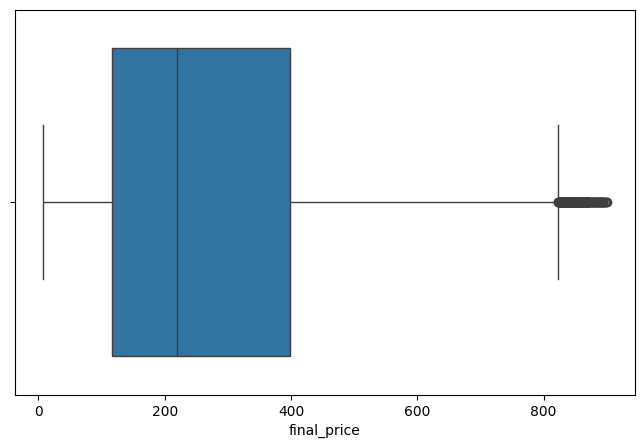

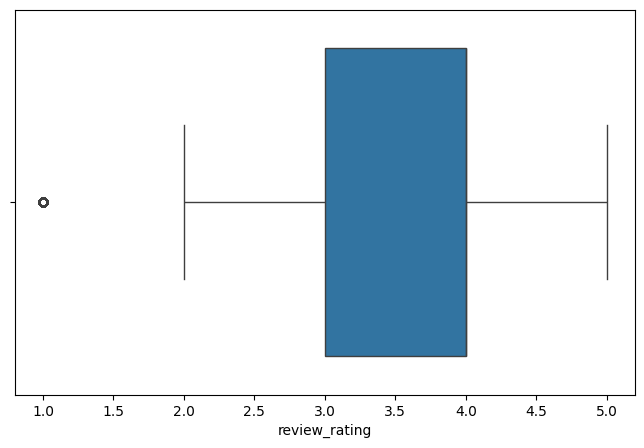

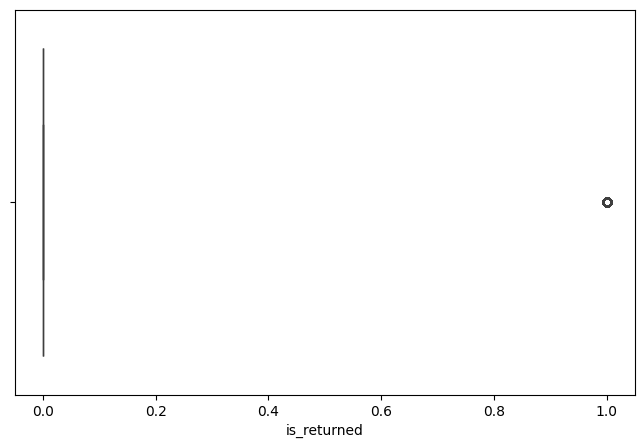

In [18]:
cols = ['final_price', 'review_rating', 'is_returned']
for col in cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df[col])

In [19]:
def check_spelling(value, valid_list, threshold=70):
    match, score = process.extractOne(value, valid_list)
    if score >= threshold and value != match:
        return match
    return value

valid_values = ['Rompers', 'Blankets', 'Jeans', 'Sneakers', 'Shoes', 'Shirts',
       'Watches', 'Jewelry', 'Booties', 'Caps', 'Sandals', 'Sweaters',
       'Hats', 'Handbags', 'T-Shirts', 'Shorts', 'Jackets', 'Dresses', 'Onesies']

df['sub_category'] = df['sub_category'].apply(lambda x: check_spelling(x, valid_values))

valid_values = ['Baby', 'Men', 'Kids', 'Women']

df['main_category'] = df['main_category'].apply(lambda x: check_spelling(x, valid_values))


## Feature Engineering:

### Extrat details from order date

In [20]:
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.weekday
df['order_day_name'] = df['order_date'].dt.day_name()
df['order_year'] = df['order_date'].dt.year

### Calculate Discount Amount

In [21]:
df['discount_amount'] = (df['price'] * df['discount_percent']) / 100

### Calculate Unit Price

In [22]:
df['unit_price'] = df['final_price'] / df['quantity']

### Calculate delivery speed

In [23]:
df['delivery_speed'] = df['delivery_days'].apply(lambda x: 'Fast' if x <= 3 else 'Slow')

### Customer-level aggregates

In [24]:
customer_level_summary = df.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    total_orders=('order_id', 'count'),
    average_rating=('review_rating', 'mean'),
    return_rate=('is_returned', 'mean')
)

print("\nSummary by Customer:")
display(customer_level_summary)


Summary by Customer:


,total_spend,total_orders,average_rating,return_rate
customer_id,,,,
0000A5486A60,565.98,1,2.0,0.0
000128A482A9,343.10,1,3.0,0.0
0006310A3377,203.02,1,5.0,0.0
00069A393862,541.82,1,3.0,0.0
00070A643221,86.88,1,4.0,0.0
...,...,...,...,...
AAA992357434,159.62,1,3.0,0.0
AAAA33688A18,112.50,1,4.0,0.0
AAAA437A5312,79.60,1,3.0,0.0



# **B. Univariate Analysis**

### Distribution

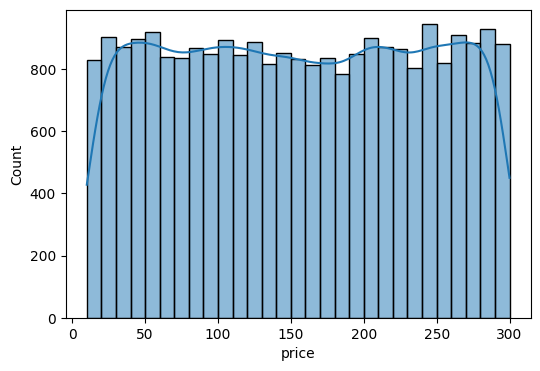

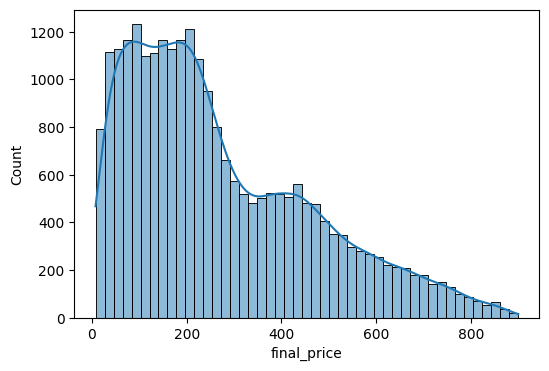

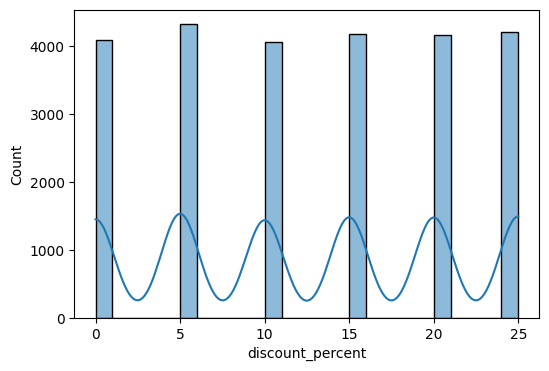

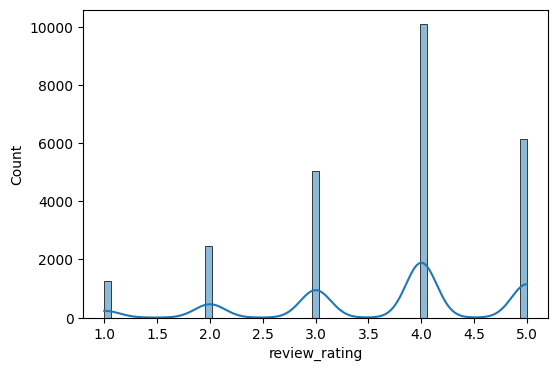

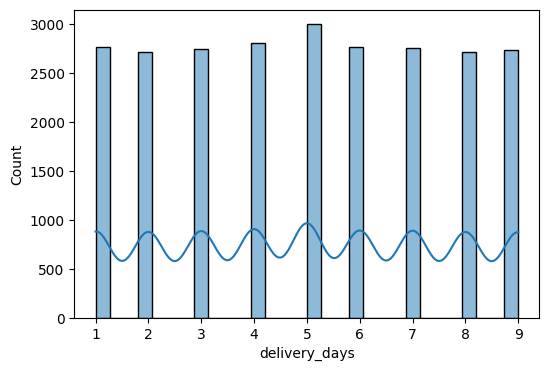

In [25]:
for col in ['price', 'final_price', 'discount_percent',
            'review_rating', 'delivery_days']:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col].dropna(), kde=True)

<Figure size 600x400 with 0 Axes>

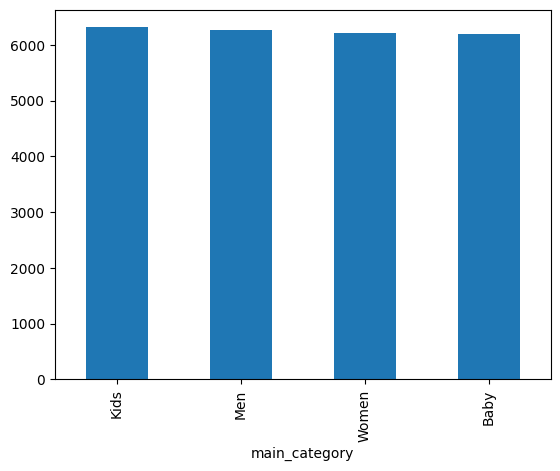

<Figure size 600x400 with 0 Axes>

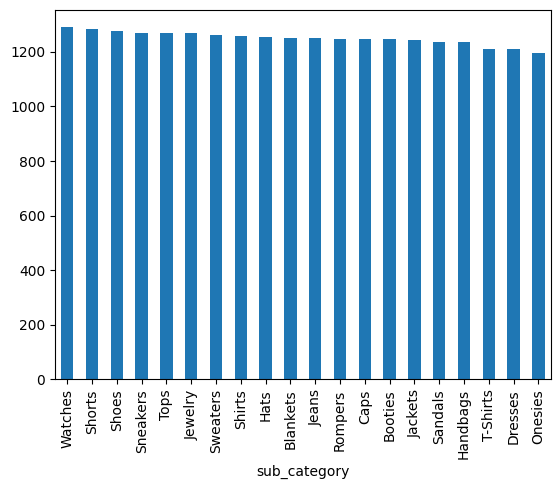

<Figure size 600x400 with 0 Axes>

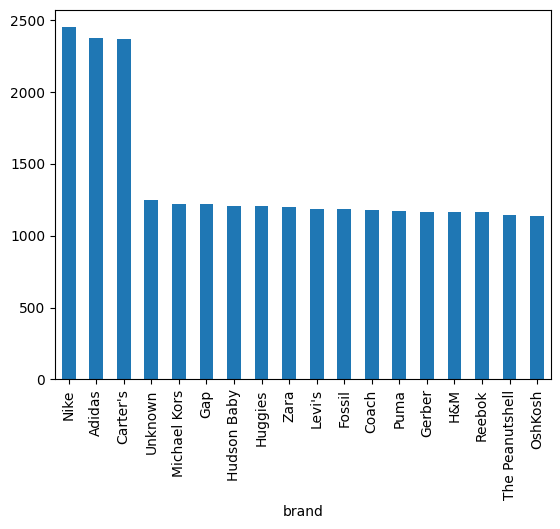

<Figure size 600x400 with 0 Axes>

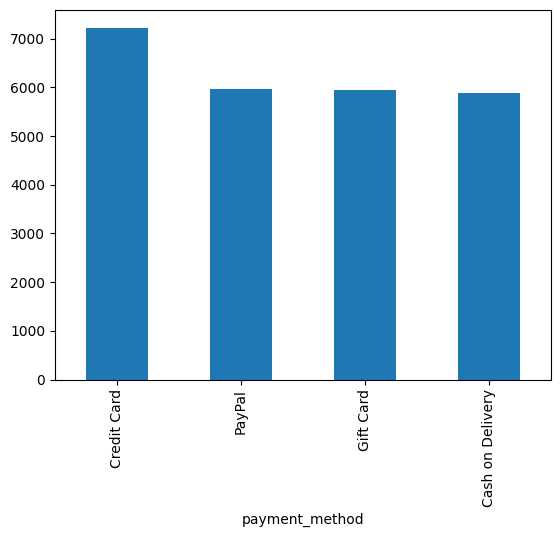

<Figure size 600x400 with 0 Axes>

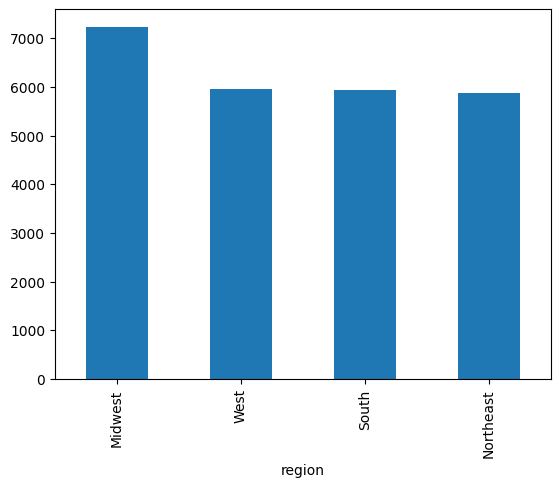

<Figure size 600x400 with 0 Axes>

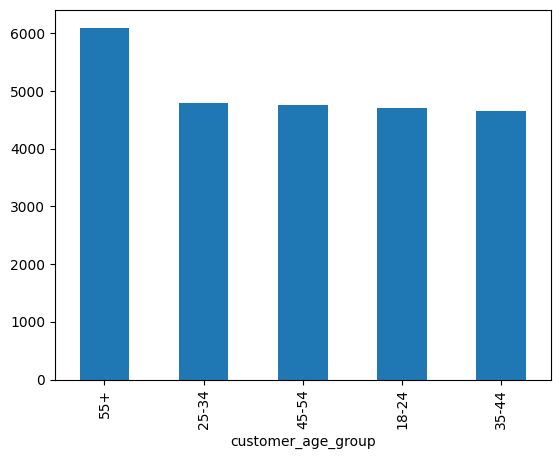

<Figure size 600x400 with 0 Axes>

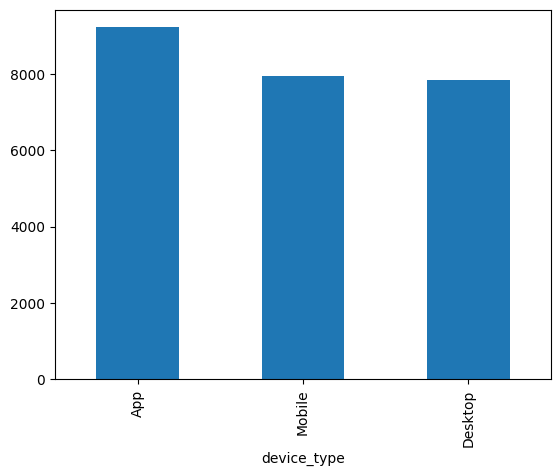

In [26]:
for col in ['main_category', 'sub_category', 'brand', 'payment_method',
            'region', 'customer_age_group', 'device_type']:
  plt.figure(figsize=(6,4))
  fig, ax = plt.subplots()
  df[col].value_counts().plot(ax=ax, kind='bar')


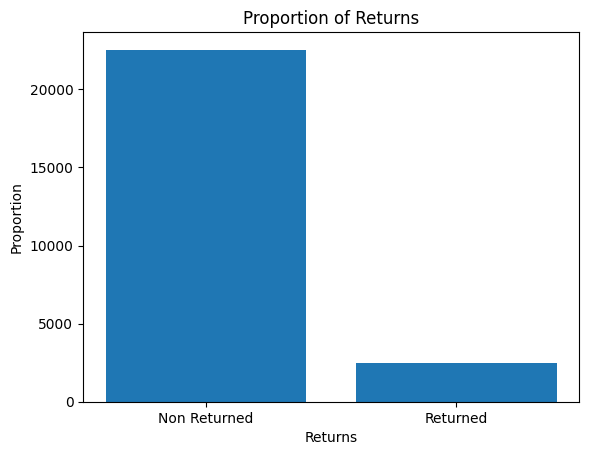

In [27]:
proportions = df['is_returned'].value_counts()
plt.bar(['Non Returned', 'Returned'], proportions)
plt.title('Proportion of Returns')
plt.xlabel('Returns')
plt.ylabel('Proportion')
plt.show()

# **C. Bivariate & Multivariate Analysis**

## Sales Performance


Summary by revenue:


,order_month,final_price
0,1,574091.72
1,2,502790.32
2,3,600881.50
3,4,573181.85
4,5,586462.73
5,6,527484.14
6,7,579775.00
7,8,555984.18
8,9,585853.10
9,10,560576.79


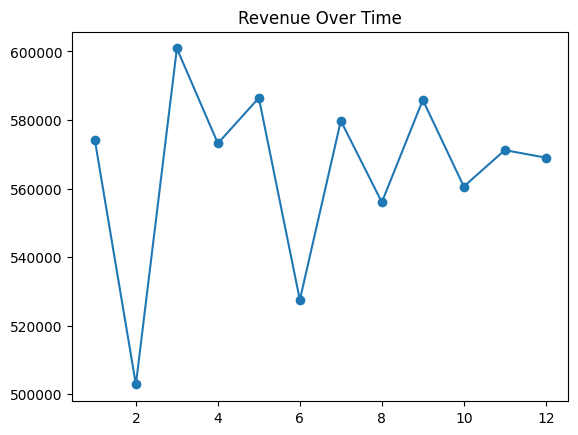

In [28]:
revenue_over_time = df.groupby('order_month').agg({
    'final_price': 'sum',  # Sum of final_price for each order month
}).reset_index()

print("\nSummary by revenue:")
display(revenue_over_time)

plt.plot(revenue_over_time['order_month'], revenue_over_time['final_price'], marker='o')
plt.title("Revenue Over Time")
plt.show()


Summary by revenue:


,order_weekday,final_price
0,0,999149.32
1,1,969389.32
2,2,973226.57
3,3,982977.25
4,4,947692.03
5,5,976971.52
6,6,937889.29


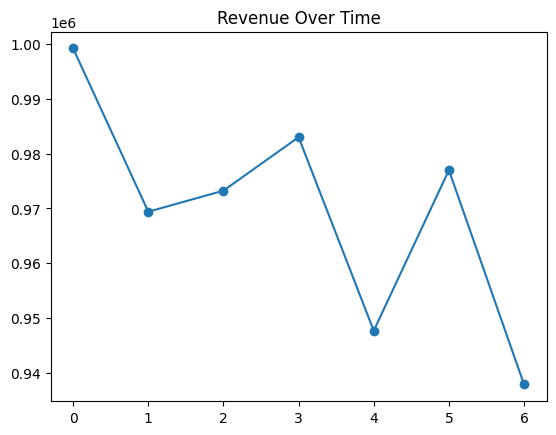

In [29]:
revenue_over_time = df.groupby('order_weekday').agg({
    'final_price': 'sum',  # Sum of final_price for each order weekday
}).reset_index()

print("\nSummary by revenue:")
display(revenue_over_time)

plt.plot(revenue_over_time['order_weekday'], revenue_over_time['final_price'], marker='o')
plt.title("Revenue Over Time")
plt.show()


Summary by revenue:


,main_category,final_price
0,Baby,1655948.68
1,Kids,1709826.45
2,Men,1716692.34
3,Women,1704827.83


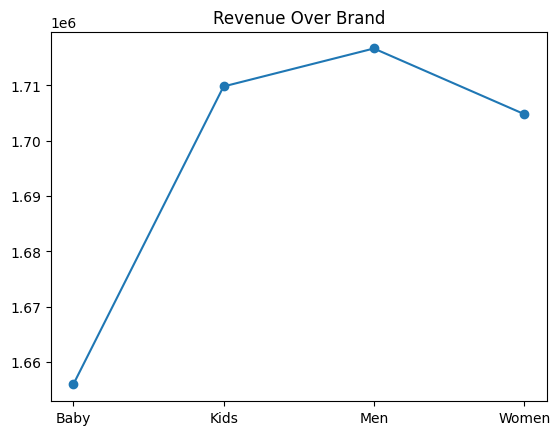

In [30]:
revenue_over_brand = df.groupby('main_category').agg({
    'final_price': 'sum',  # Sum of final_price for each order weekday
}).reset_index()

print("\nSummary by revenue:")
display(revenue_over_brand)

plt.plot(revenue_over_brand['main_category'], revenue_over_brand['final_price'], marker='o')
plt.title("Revenue Over Brand")
plt.show()

## Discount Effectiveness


Summary by revenue:


,discount_percent,final_price
0,0,1261991.19
1,5,1275805.21
2,10,1139740.55
3,15,1094157.86
4,20,1029827.87
5,25,985772.62


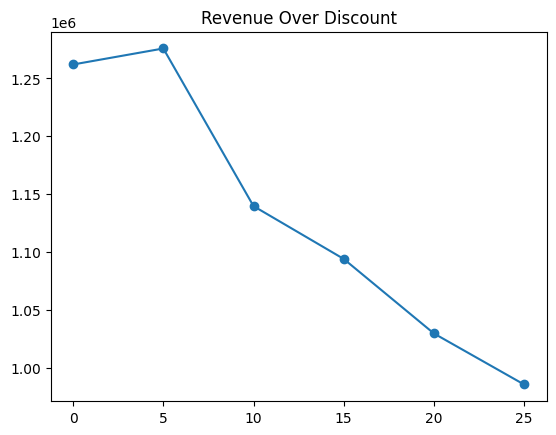

In [31]:
revenue_over_discount_percent = df.groupby('discount_percent').agg({
    'final_price': 'sum',  # Sum of final_price for each discount bin
}).reset_index()

print("\nSummary by revenue:")
display(revenue_over_discount_percent)

plt.plot(revenue_over_discount_percent['discount_percent'],
         revenue_over_discount_percent['final_price'], marker='o')
plt.title("Revenue Over Discount")
plt.show()


Summary by revenue:


,discount_percent,quantity
0,0,4087
1,5,4317
2,10,4051
3,15,4172
4,20,4163
5,25,4210


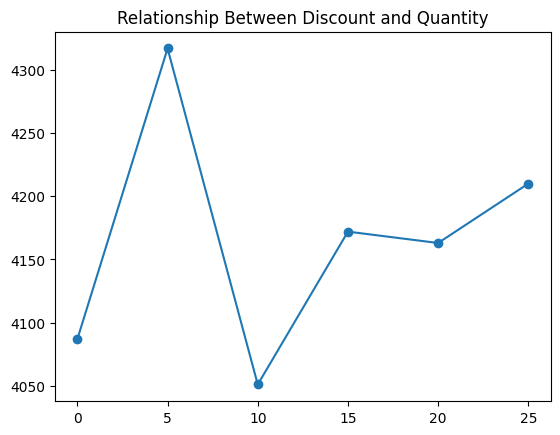

In [32]:
revenue_over_discount_percent = df.groupby('discount_percent').agg({
    'quantity': 'count',  # count of quantity for each discount bin
}).reset_index()

print("\nSummary by revenue:")
display(revenue_over_discount_percent)

plt.plot(revenue_over_discount_percent['discount_percent'],
         revenue_over_discount_percent['quantity'], marker='o')
plt.title("Relationship Between Discount and Quantity")
plt.show()

## Returns Analysis


Summary of return rate by main_category:


,main_category,is_returned,order_id,return_rate
0,Baby,607,6193,9.801389
1,Kids,600,6316,9.499683
2,Men,650,6270,10.366826
3,Women,604,6221,9.709050


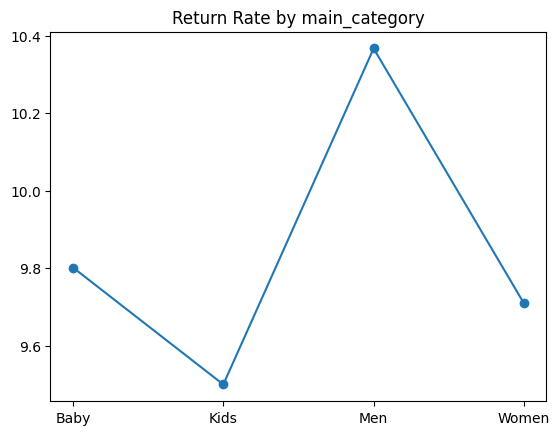


Summary of return rate by brand:


,brand,is_returned,order_id,return_rate
0,Adidas,236,2378,9.924306
1,Carter's,209,2369,8.822288
2,Coach,109,1179,9.245123
3,Fossil,117,1183,9.890110
4,Gap,121,1219,9.926169
5,Gerber,127,1168,10.873288
6,H&M,114,1167,9.768638
7,Hudson Baby,107,1209,8.850289
8,Huggies,122,1208,10.099338
9,Levi's,128,1189,10.765349


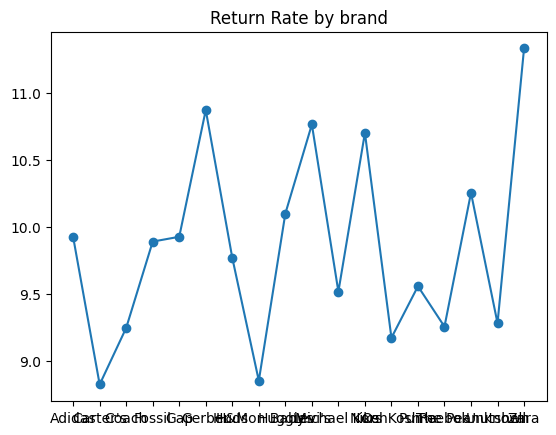


Summary of return rate by customer_age_group:


,customer_age_group,is_returned,order_id,return_rate
0,18-24,473,4709,10.044595
1,25-34,473,4785,9.885057
2,35-44,452,4653,9.714163
3,45-54,427,4754,8.981910
4,55+,636,6099,10.427939


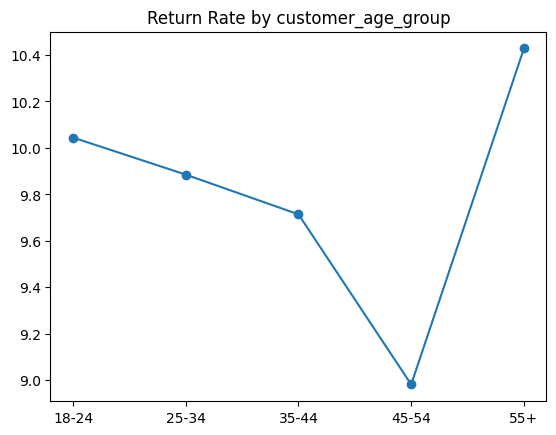


Summary of return rate by device_type:


,device_type,is_returned,order_id,return_rate
0,App,904,9224,9.800520
1,Desktop,786,7842,10.022953
2,Mobile,771,7934,9.717671


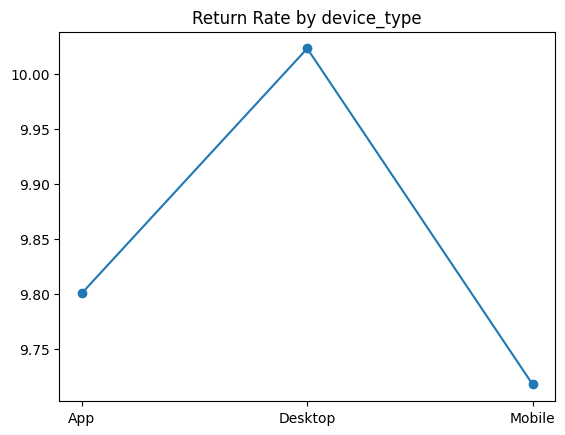

In [33]:
columns = ['main_category', 'brand', 'customer_age_group', 'device_type']

for col in columns:
  return_rate = df.groupby(col).agg({
      'is_returned': 'sum',  # Sum of final_price for each discount bin
      'order_id': 'count'
  }).reset_index()

  return_rate['return_rate'] = (return_rate['is_returned']/return_rate['order_id'])*100
  print(f"\nSummary of return rate by {col}:")
  display(return_rate)

  plt.plot(return_rate[col],
          return_rate['return_rate'], marker='o')
  plt.title(f"Return Rate by {col}")
  plt.show()

## Customer Behavior

In [34]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'product_name',
       'main_category', 'sub_category', 'brand', 'price', 'quantity',
       'discount_percent', 'final_price', 'payment_method', 'review_rating',
       'order_date', 'delivery_days', 'is_returned', 'region',
       'customer_age_group', 'device_type', 'order_month', 'order_weekday',
       'order_day_name', 'order_year', 'discount_amount', 'unit_price',
       'delivery_speed'],
      dtype='object')

,customer_id,final_price,buyer_segmant
0,0000A5486A60,565.98,High Value Buyer
1,000128A482A9,343.10,High Value Buyer
2,0006310A3377,203.02,Low Value Buyer
3,00069A393862,541.82,High Value Buyer
4,00070A643221,86.88,Low Value Buyer
...,...,...,...
24995,AAA992357434,159.62,Low Value Buyer
24996,AAAA33688A18,112.50,Low Value Buyer
24997,AAAA437A5312,79.60,Low Value Buyer
24998,AAAA660A8A17,495.32,High Value Buyer


,count
buyer_segmant,
Low Value Buyer,16075
High Value Buyer,8925


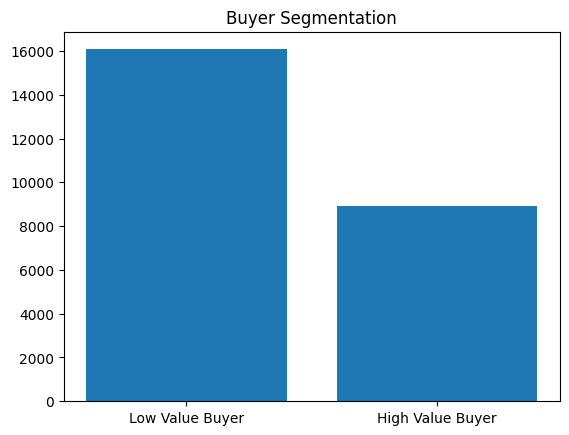

In [35]:
buyer_segment = df.groupby('customer_id').agg({
      'final_price': 'sum'
  }).reset_index()

buyer_segment['buyer_segmant'] = buyer_segment['final_price'].apply(
    lambda x: 'High Value Buyer' if x>300 else 'Low Value Buyer'
)
display(buyer_segment)

segments = buyer_segment['buyer_segmant'].value_counts()
display(segments)
plt.bar(segments.index, segments.values)
plt.title('Buyer Segmentation')
plt.show()


Summary of Average Order Value region:


,region,final_price
0,Midwest,271.682386
1,Northeast,274.334741
2,South,271.386894
3,West,268.567180


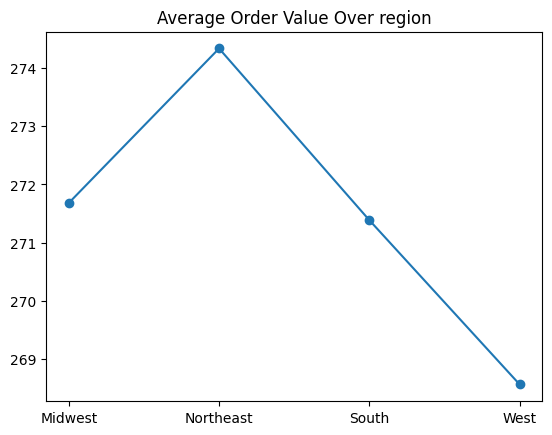


Summary of Average Order Value customer_age_group:


,customer_age_group,final_price
0,18-24,277.328573
1,25-34,274.464765
2,35-44,268.324251
3,45-54,267.671849
4,55+,270.046965


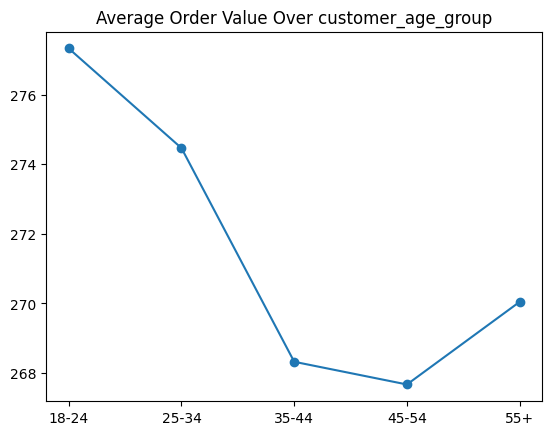

In [36]:
# Average order value (AOV) by region / age group.
columns = ['region', 'customer_age_group']

for col in columns:
  order_value = df.groupby(col).agg({
        'final_price': 'mean'}).reset_index()

  print(f"\nSummary of Average Order Value {col}:")
  display(order_value)

  plt.plot(order_value[col], order_value['final_price'], marker='o')
  plt.title(f"Average Order Value Over {col}")
  plt.show()


## Delivery Performance

,delivery_days,review_rating,is_returned
0,1.0,3.676556,295
1,2.0,3.696100,231
2,3.0,3.673105,252
3,4.0,3.724064,275
4,5.0,3.683684,335
5,6.0,3.705179,287
6,7.0,3.700036,268
7,8.0,3.687293,275
8,9.0,3.737130,243


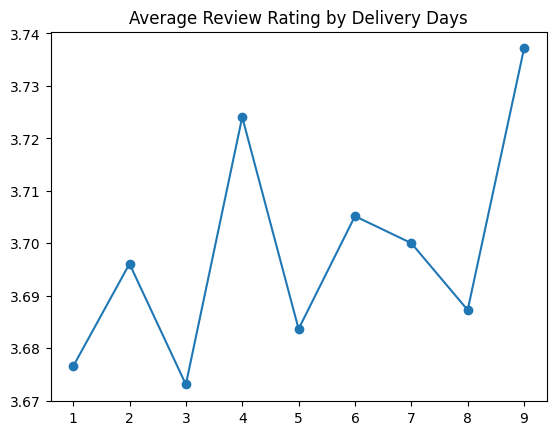

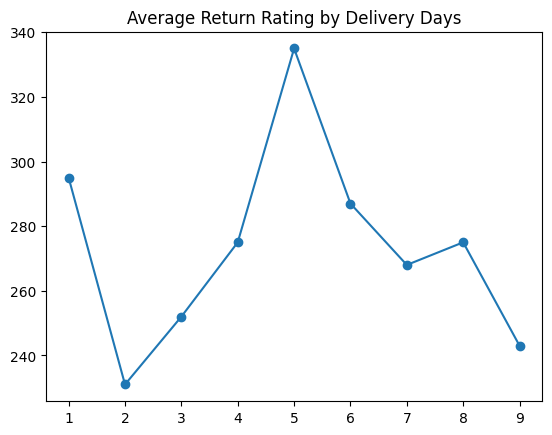

In [37]:
delivery_days_effect = df.groupby('delivery_days').agg({
      'review_rating': 'mean',
      'is_returned': 'sum',
  }).reset_index()

display(delivery_days_effect)
plt.plot(delivery_days_effect['delivery_days'], delivery_days_effect['review_rating'], marker='o')
plt.title("Average Review Rating by Delivery Days")
plt.show()

plt.plot(delivery_days_effect['delivery_days'], delivery_days_effect['is_returned'], marker='o')
plt.title("Average Return Rating by Delivery Days")
plt.show()

## Rating Signal


Summary by brand:


,brand,review_rating
0,Adidas,3.701850
1,Carter's,3.699873
2,Coach,3.684478
3,Fossil,3.737954
4,Gap,3.693191
5,Gerber,3.673801
6,H&M,3.699229
7,Hudson Baby,3.636890
8,Huggies,3.700331
9,Levi's,3.730866


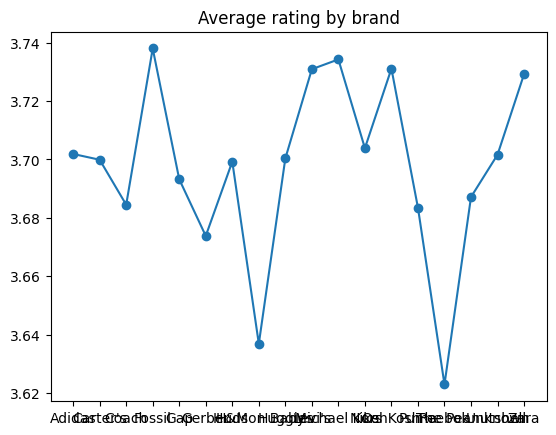


Summary by main_category:


,main_category,review_rating
0,Baby,3.681899
1,Kids,3.700285
2,Men,3.712440
3,Women,3.697316


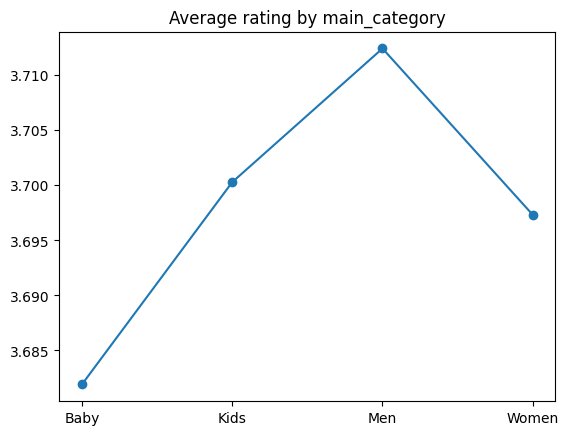


Summary by region:


,region,review_rating
0,Midwest,3.700097
1,Northeast,3.703306
2,South,3.699041
3,West,3.689366


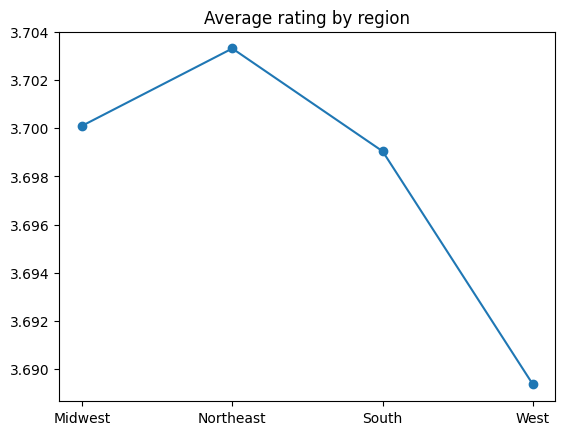

In [38]:
columns = ['brand', 'main_category', 'region']
for col in columns:
  rating_summary = df.groupby(col).agg({
      'review_rating': 'mean',
  }).reset_index()
  print(f"\nSummary by {col}:")
  display(rating_summary)

  plt.plot(rating_summary[col], rating_summary['review_rating'], marker='o')
  plt.title(f"Average rating by {col}")
  plt.show()



Summary of Rating vs Returns:


,review_rating,is_returned
0,1,0.100478
1,2,0.093916
2,3,0.092908
3,4,0.099802
4,5,0.102127


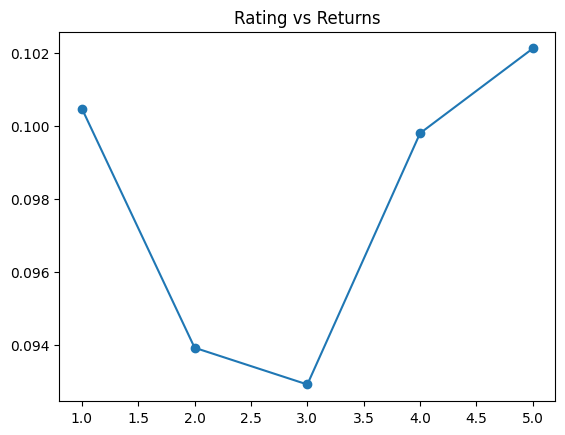

In [39]:
rating_vs_returns_summary = df.groupby('review_rating').agg({
    'is_returned': 'mean',
}).reset_index()
print(f"\nSummary of Rating vs Returns:")
display(rating_vs_returns_summary)

plt.plot(rating_vs_returns_summary['review_rating'], rating_vs_returns_summary['is_returned'], marker='o')
plt.title(f"Rating vs Returns")
plt.show()


## Payment Method Insights


Summary by payment_method:


,payment_method,is_returned,final_price,review_rating
0,Cash on Delivery,0.089006,272.263923,3.711538
1,Credit Card,0.097578,270.564509,3.691626
2,Gift Card,0.105892,273.064448,3.683670
3,PayPal,0.101359,270.287144,3.706830


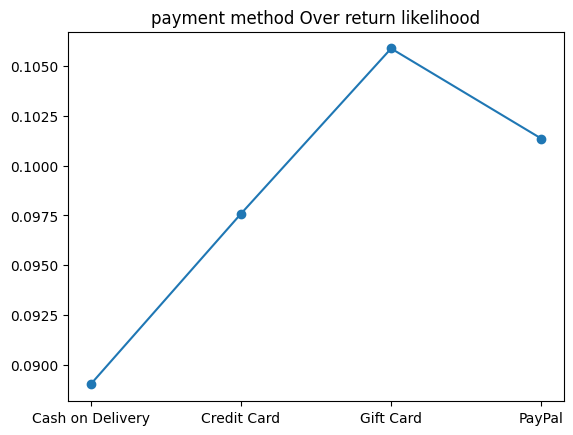

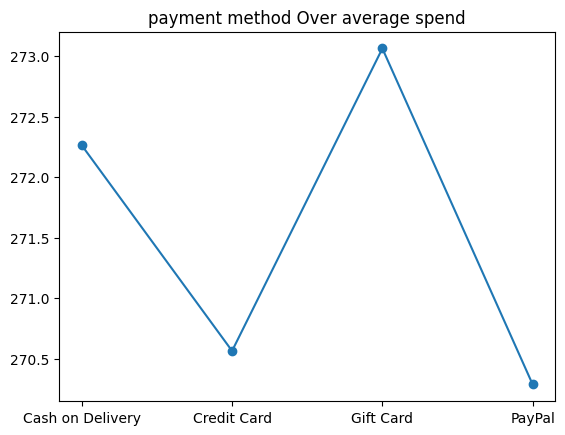

In [40]:
payment_method_summary = df.groupby('payment_method').agg({
    'is_returned': 'mean',  # Mean of is_returned for each payment_method
    'final_price': 'mean',     # Mean of purchases for each payment_method
    'review_rating': 'mean'
    }).reset_index()
print("\nSummary by payment_method:")
display(payment_method_summary)

plt.plot(payment_method_summary['payment_method'], payment_method_summary['is_returned'], marker='o')
plt.title("payment method Over return likelihood")
plt.show()

plt.plot(payment_method_summary['payment_method'], payment_method_summary['final_price'], marker='o')
plt.title("payment method Over average spend")
plt.show()

## Cross-analysis

,device_type,is_returned
0,Desktop,0.100230
1,Mobile,0.097177


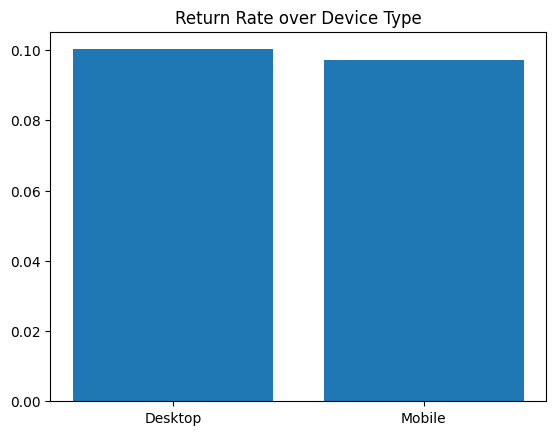

In [41]:
df_filtered = df[df['device_type'].isin(['Mobile', 'Desktop'])]

return_rate_summary = df_filtered.groupby('device_type').agg({
    'is_returned': 'mean'
}).reset_index()

display(return_rate_summary)

plt.bar(return_rate_summary['device_type'], return_rate_summary['is_returned'])
plt.title('Return Rate over Device Type')
plt.show()

,region,delivery_days
0,Midwest,4.998617
1,Northeast,5.021472
2,South,4.952197
3,West,5.006877


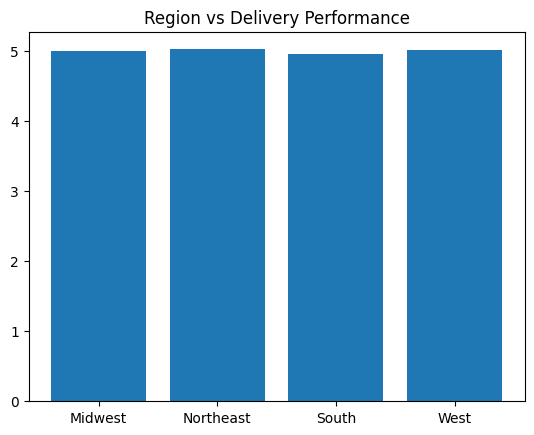

In [42]:
region_vs_delivery_performance_summary = df.groupby('region').agg({
    'delivery_days': 'mean'
}).reset_index()

display(region_vs_delivery_performance_summary)

plt.bar(region_vs_delivery_performance_summary['region'],
        region_vs_delivery_performance_summary['delivery_days'])
plt.title('Region vs Delivery Performance')
plt.show()

,customer_age_group,discount_percent
0,18-24,12.585475
1,25-34,12.518286
2,35-44,12.522029
3,45-54,12.486327
4,55+,12.525824


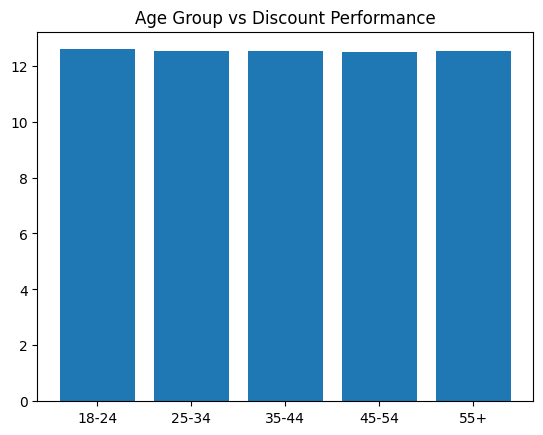

In [43]:
age_group_vs_discount_summary = df.groupby('customer_age_group').agg({
    'discount_percent': 'mean'
}).reset_index()

display(age_group_vs_discount_summary)

plt.bar(age_group_vs_discount_summary['customer_age_group'],
        age_group_vs_discount_summary['discount_percent'])
plt.title('Age Group vs Discount Performance')
plt.show()

#**D. Hypothesis Ideas**

## Certain age groups (e.g., 25–34) have higher average order values.
Customers in age group 18-24 have highest average order values.

In [44]:
aov_by_age = df.groupby('customer_age_group').agg({
    'final_price': 'mean',
    'order_id': 'count'
}).reset_index()

display(aov_by_age)

,customer_age_group,final_price,order_id
0,18-24,277.328573,4709
1,25-34,274.464765,4785
2,35-44,268.324251,4653
3,45-54,267.671849,4754
4,55+,270.046965,6099


## Payment method “Gift Card” orders have distinct patterns in rating or returns.

Gift card order have highest average spends but also highest returns. No significant pattern in rating.

In [45]:
payment_method_summary = df.groupby('payment_method').agg({
    'is_returned': 'mean',  # Mean of is_returned for each payment_method
    'final_price': 'mean',     # Mean of purchases for each payment_method
    'review_rating': 'mean'
    }).reset_index()
print("\nSummary by payment_method:")
display(payment_method_summary)



Summary by payment_method:


,payment_method,is_returned,final_price,review_rating
0,Cash on Delivery,0.089006,272.263923,3.711538
1,Credit Card,0.097578,270.564509,3.691626
2,Gift Card,0.105892,273.064448,3.683670
3,PayPal,0.101359,270.287144,3.706830


## Premium brands (e.g., Nike) have lower return rates despite higher prices.

No, despite high prices premium brands have similar return rate as other non-premium brands.

In [46]:
return_rate = df.groupby('brand').agg({
    'is_returned': 'sum',  # Sum of final_price for each discount bin
    'order_id': 'count'
}).reset_index()

return_rate['return_rate'] = (return_rate['is_returned']/return_rate['order_id'])*100
print(f"\nSummary of return rate by {col}:")
display(return_rate)



Summary of return rate by region:


,brand,is_returned,order_id,return_rate
0,Adidas,236,2378,9.924306
1,Carter's,209,2369,8.822288
2,Coach,109,1179,9.245123
3,Fossil,117,1183,9.890110
4,Gap,121,1219,9.926169
5,Gerber,127,1168,10.873288
6,H&M,114,1167,9.768638
7,Hudson Baby,107,1209,8.850289
8,Huggies,122,1208,10.099338
9,Levi's,128,1189,10.765349


## Longer delivery times negatively impact review ratings and increase returns.

There is no strong evidence that longer delivery times have negative impacts. There can be other factors such as expectations, quality, price affecting review ratings and returns.

In [47]:
delivery_days_effect = df.groupby('delivery_days').agg({
      'review_rating': 'mean',
      'is_returned': 'sum',
      'order_id': 'count'
  }).reset_index()
delivery_days_effect['return_rate'] = (delivery_days_effect['is_returned']/delivery_days_effect['order_id'])*100
display(delivery_days_effect)

,delivery_days,review_rating,is_returned,order_id,return_rate
0,1.0,3.676556,295,2764,10.672938
1,2.0,3.696100,231,2718,8.498896
2,3.0,3.673105,252,2744,9.183673
3,4.0,3.724064,275,2805,9.803922
4,5.0,3.683684,335,2997,11.177845
5,6.0,3.705179,287,2761,10.394784
6,7.0,3.700036,268,2757,9.720711
7,8.0,3.687293,275,2715,10.128913
8,9.0,3.737130,243,2739,8.871851


## Higher discounts lead to higher quantity sold but also higher return rates.

Higher discounts do lead to higher quantity sold but do not drastically impact return rates.

In [48]:
revenue_over_discount_percent = df.groupby('discount_percent').agg({
    'order_id': 'count',
    'is_returned': 'sum',
  }).reset_index()
revenue_over_discount_percent['return_rate'] = (revenue_over_discount_percent['is_returned']/revenue_over_discount_percent['order_id'])*100

print("\nSummary by Discount:")
display(revenue_over_discount_percent)


Summary by Discount:


,discount_percent,order_id,is_returned,return_rate
0,0,4087,391,9.566920
1,5,4317,451,10.447070
2,10,4051,398,9.824735
3,15,4172,399,9.563758
4,20,4163,416,9.992794
5,25,4210,406,9.643705


## Customers ordering from specific regions have systematically different return behavior.

Customers from Midwest made most orders aswell as returns.

In [49]:
order_value = df.groupby('region').agg({
      'order_id': 'count',
      'is_returned': 'sum'}).reset_index()
order_value['return_rate'] = (order_value['is_returned']/order_value['order_id'])*100
display(order_value)

,region,order_id,is_returned,return_rate
0,Midwest,7229,737,10.195048
1,Northeast,5868,544,9.270620
2,South,5941,594,9.998317
3,West,5962,586,9.828916


## Mobile shoppers behave differently in terms of average spend or returns compared to desktop.

Mobile Shoppers have lower average spending and returns than Desktop users.

In [50]:
df_filtered = df[df['device_type'].isin(['Mobile', 'Desktop'])]

return_rate_summary = df_filtered.groupby('device_type').agg({
    'is_returned': 'mean',
    'final_price': 'mean'
}).reset_index()

display(return_rate_summary)

,device_type,is_returned,final_price
0,Desktop,0.100230,275.66435
1,Mobile,0.097177,267.93185


# **Advanced Analyses**

## Cohort Analysis

In [51]:
updated_df = df.copy(deep=True)
return_rate_summary = updated_df.groupby(['customer_id']).agg({
    'order_date': 'min',
    'order_month': 'min',
    'order_year': 'min'
}).reset_index()
return_rate_summary['cohort_month'] = return_rate_summary.apply(
    lambda row: f"{int(row['order_year'])}-{int(row['order_month']):02d}", axis=1
)
updated_df = updated_df.merge(return_rate_summary[['customer_id',
                                                   'cohort_month']],
                              on='customer_id', how='left')

updated_df

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,customer_age_group,device_type,order_month,order_weekday,order_day_name,order_year,discount_amount,unit_price,delivery_speed,cohort_month
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,Baby,Rompers,Huggies,118.62,1,10,...,25-34,Mobile,9,1,Tuesday,2024,11.8620,106.760000,Slow,2024-09
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,25-34,Mobile,6,2,Wednesday,2025,4.0260,22.810000,Slow,2025-06
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,35-44,Mobile,1,2,Wednesday,2025,54.8450,164.535000,Slow,2025-01
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,45-54,Mobile,8,2,Wednesday,2024,0.0000,12.050000,Fast,2024-08
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,45-54,Mobile,11,1,Tuesday,2024,14.5360,130.820000,Slow,2024-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,...,55+,Desktop,11,4,Friday,2024,25.6520,102.610000,Slow,2024-11
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,Women,Sandals,Reebok,200.66,3,20,...,45-54,Desktop,1,4,Friday,2025,40.1320,160.526667,Slow,2025-01
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,...,25-34,App,1,3,Thursday,2025,26.1740,104.695000,Slow,2025-01
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booties,The Peanutshell,172.17,1,15,...,25-34,Desktop,10,2,Wednesday,2024,25.8255,146.340000,Slow,2024-10


In [52]:
return_rate_summary = df.groupby(['order_year', 'order_month']).agg({
    'customer_id': 'count',
}).reset_index()
return_rate_summary

,order_year,order_month,customer_id
0,2024,7,2117
1,2024,8,2087
2,2024,9,2167
3,2024,10,2058
4,2024,11,2098
5,2024,12,2090
6,2025,1,2108
7,2025,2,1910
8,2025,3,2170
9,2025,4,2052


## Customer Segmentation

## Price Elasticity Estimation

,discount_percent,quantity,final_price,unit_price
0,0,8191,1261991.19,154.021852
1,5,8616,1275805.21,148.260011
2,10,8132,1139740.55,140.185655
3,15,8279,1094157.86,131.861787
4,20,8325,1029827.87,124.189849
5,25,8442,985772.62,116.712511


Correlation between unit price and quantity: -0.13625619929147656


Text(146.32075960362124, 8185.2, 'correlation = -0.13625619929147656')

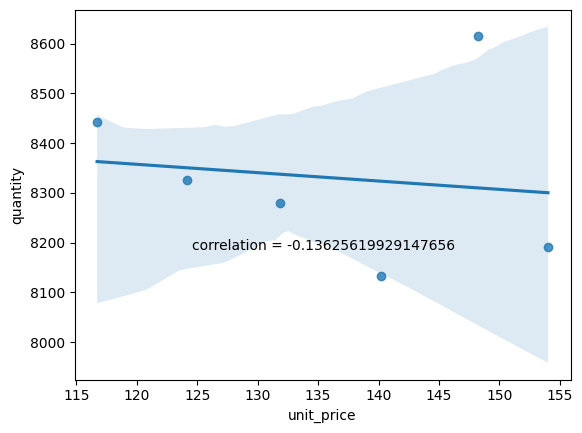

In [53]:
price_elasticity_summary = df.groupby(['discount_percent']).agg({
    'quantity': 'sum',
    'final_price': 'sum',
    'unit_price': 'mean'
}).reset_index()

display(price_elasticity_summary)

correlation = price_elasticity_summary['unit_price'].corr(price_elasticity_summary['quantity'])
print("Correlation between unit price and quantity:", correlation)

sns.regplot(x=price_elasticity_summary['unit_price'],
            y=price_elasticity_summary['quantity'])
plt.text(
    x=price_elasticity_summary['unit_price'].max()*0.95,
    y=price_elasticity_summary['quantity'].max()*0.95,
    s=f"correlation = {correlation}",
    ha='right'
)


## Return Prediction Feature Ideas

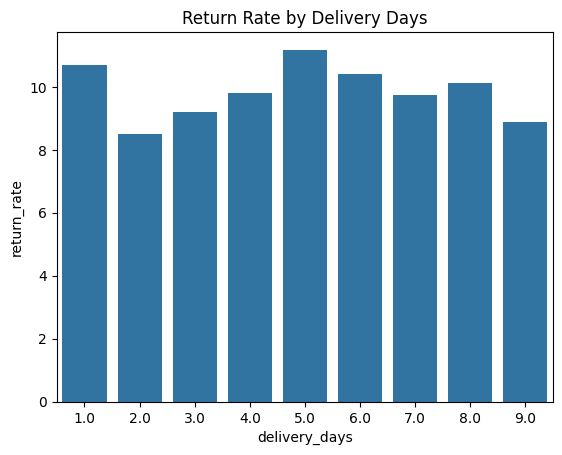

In [54]:
return_rate_summary = df.groupby(['delivery_days']).agg({
    'is_returned': 'sum',
    'order_id': 'count',
}).reset_index()

return_rate_summary['return_rate'] = (return_rate_summary['is_returned']/return_rate_summary['order_id'])*100
sns.barplot(x="delivery_days", y="return_rate", data=return_rate_summary)
plt.title("Return Rate by Delivery Days")
plt.show()


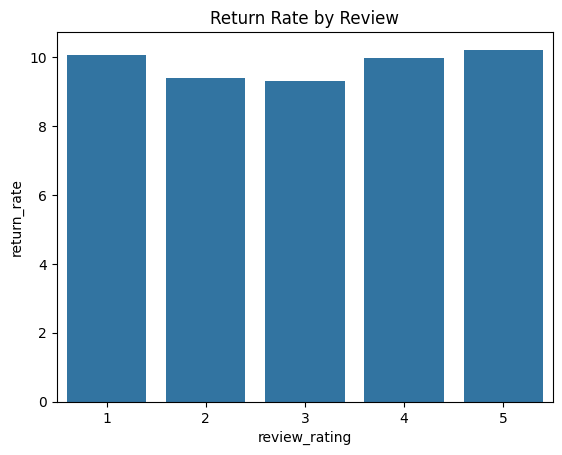

In [55]:
return_rate_summary = df.groupby(['review_rating']).agg({
    'is_returned': 'sum',
    'order_id': 'count',
}).reset_index()

return_rate_summary['return_rate'] = (return_rate_summary['is_returned']/return_rate_summary['order_id'])*100
sns.barplot(x="review_rating", y="return_rate", data=return_rate_summary)
plt.title("Return Rate by Review")
plt.show()


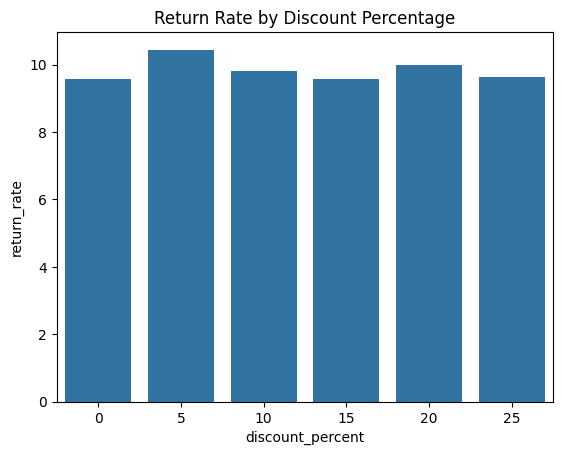

In [56]:
return_rate_summary = df.groupby(['discount_percent']).agg({
    'is_returned': 'sum',
    'order_id': 'count',
}).reset_index()

return_rate_summary['return_rate'] = (return_rate_summary['is_returned']/return_rate_summary['order_id'])*100
sns.barplot(x="discount_percent", y="return_rate", data=return_rate_summary)
plt.title("Return Rate by Discount Percentage")
plt.show()


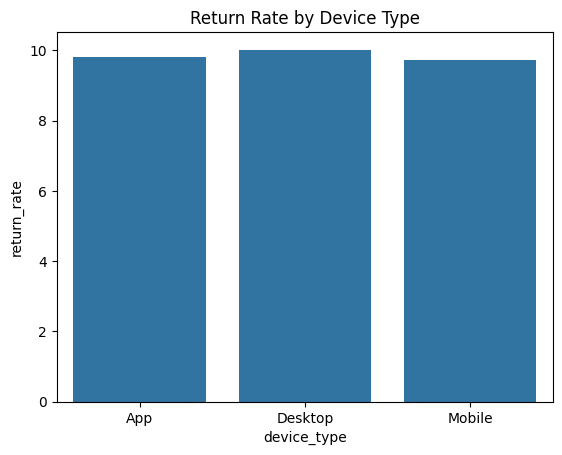

In [57]:
return_rate_summary = df.groupby(['device_type']).agg({
    'is_returned': 'sum',
    'order_id': 'count',
}).reset_index()

return_rate_summary['return_rate'] = (return_rate_summary['is_returned']/return_rate_summary['order_id'])*100
sns.barplot(x="device_type", y="return_rate", data=return_rate_summary)
plt.title("Return Rate by Device Type")
plt.show()

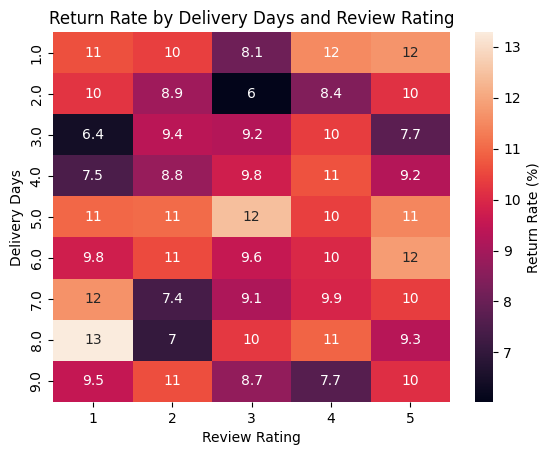

In [60]:
delivery_review_summary = df.groupby(['delivery_days', 'review_rating']).agg({
    'is_returned': 'sum',
    'order_id': 'count'
}).reset_index()

delivery_review_summary['return_rate'] = (delivery_review_summary['is_returned'] / delivery_review_summary['order_id']) * 100

pivot_table = delivery_review_summary.pivot(index='delivery_days',
                                            columns='review_rating',
                                            values='return_rate')

sns.heatmap(pivot_table, annot=True, cbar_kws={'label': 'Return Rate (%)'})
plt.title('Return Rate by Delivery Days and Review Rating')
plt.ylabel('Delivery Days')
plt.xlabel('Review Rating')
plt.show()

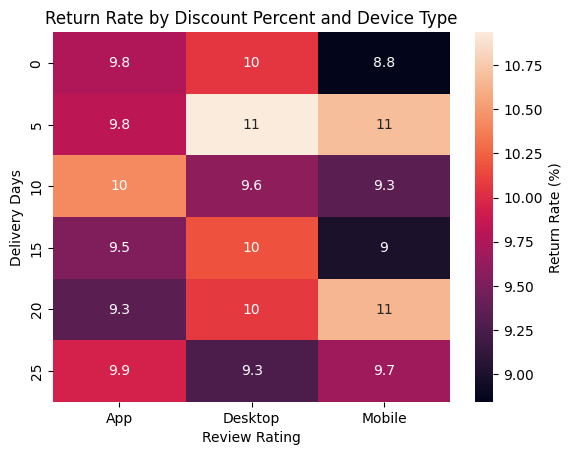

In [61]:
discount_device_summary = df.groupby(['discount_percent', 'device_type']).agg({
    'is_returned': 'sum',
    'order_id': 'count'
}).reset_index()

discount_device_summary['return_rate'] = (discount_device_summary['is_returned'] / discount_device_summary['order_id']) * 100

pivot_table = discount_device_summary.pivot(index='discount_percent',
                                            columns='device_type',
                                            values='return_rate')

sns.heatmap(pivot_table, annot=True, cbar_kws={'label': 'Return Rate (%)'})
plt.title('Return Rate by Discount Percent and Device Type')
plt.ylabel('Delivery Days')
plt.xlabel('Review Rating')
plt.show()

## Anomaly Detection

,brand,anomaly_count
11,Nike,64
0,Adidas,56
1,Carter's,49
16,Unknown,36
9,Levi's,33
14,Reebok,33
17,Zara,33
2,Coach,32
7,Hudson Baby,32
5,Gerber,31


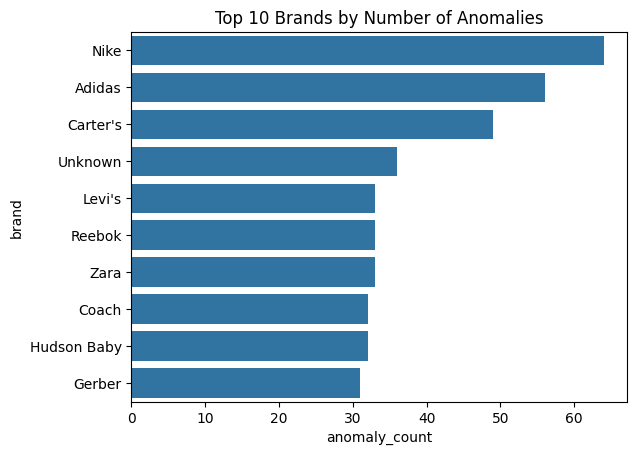

,0
device_type,
App,234
Desktop,188
Mobile,183


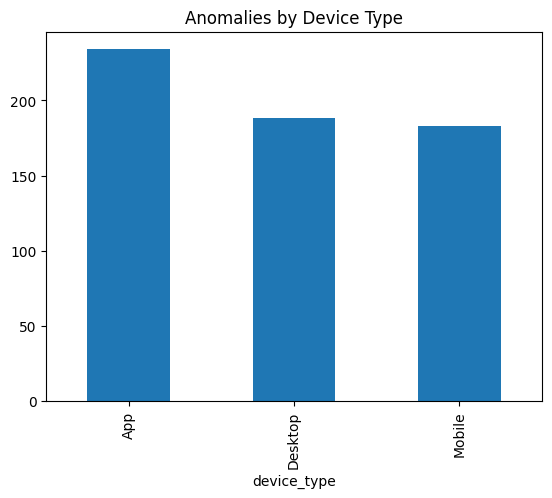

In [77]:
high_discount_threshold = 25
high_quantity_threshold = df['quantity'].median()

anomaly_1 = df[
    (df['discount_percent'] >= high_discount_threshold) &
    (df['quantity'] > high_quantity_threshold) &
    (df['is_returned'] == 1)
]

low_price_threshold = df['unit_price'].quantile(0.20)

anomaly_2 = df[
    (df['unit_price'] < low_price_threshold) &
    (df['is_returned'] == 1)
]

anomalies_df = pd.concat([anomaly_1, anomaly_2]).drop_duplicates().reset_index(drop=True)

brand_summary = anomalies_df.groupby('brand').size().reset_index(name='anomaly_count')
brand_summary = brand_summary.sort_values('anomaly_count', ascending=False).head(10)
display(brand_summary)
sns.barplot(data=summary, x='anomaly_count', y='brand')
plt.title("Top 10 Brands by Number of Anomalies")
plt.show()

device_summary = anomalies_df.groupby(['device_type']).size()
display(device_summary)
device_summary.plot(kind='bar')
plt.title("Anomalies by Device Type")
plt.show()


## Time-to-Delivery Hotspots

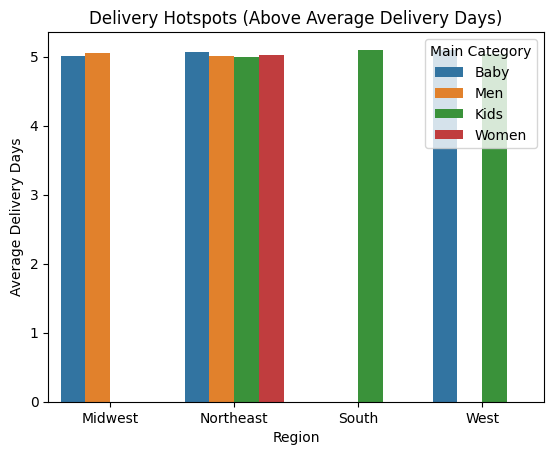

In [90]:
time_to_delivery_summary = df.groupby(['region', 'main_category']).agg({
    'delivery_days': 'mean',
}).reset_index()

overall_avg = time_to_delivery_summary['delivery_days'].mean()
time_to_delivery_summary['is_hotspot'] = time_to_delivery_summary['delivery_days'] > overall_avg

hotspots = time_to_delivery_summary[time_to_delivery_summary['is_hotspot']]

sns.barplot(data=hotspots, x='region', y='delivery_days', hue='main_category')
plt.title('Delivery Hotspots (Above Average Delivery Days)')
plt.ylabel('Average Delivery Days')
plt.xlabel('Region')
plt.legend(title='Main Category')
plt.show()

